## Iris Flowers Data Prediction using Decision Tree Algorithm

This project involves creating a Decision Tree classifier to predict the species of iris flowers based on their sepal and petal measurements. The classifier is trained on the Iris dataset, which includes three species of iris flowers: Iris setosa, Iris versicolor, and Iris virginica.

<img src="pexels-isaiah-53-439677884-16240223.jpg" width="1000">

The Iris dataset consists of 150 samples with five attributes: sepal length, sepal width, petal length, petal width, and species. The species attribute is categorical with three possible values: Iris setosa, Iris versicolor, and Iris virginica.

### **Importing Libraries**

In [33]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#### **Loading the Data**

Before we dive into modeling, we need to take a look at the data we are working with

In [6]:
iris_data = pd.read_csv("Iris.csv")

iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **Exploratory Data Analysis**

In [7]:
iris_data.info() #Taking a look at the basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Checking the basic numeric information of the variables

In [8]:
iris_data.iloc[:, 1:].describe() #Checking the basic numeric information of the variables

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking to see if there are null values in the dataset

In [9]:
iris_data.iloc[:, 1:].isnull().sum() #Checking to see if there are null values in the dataset

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Checking The number of each specy there are in the dataset

In [10]:
iris_data["Species"].value_counts() #Checking The number of each specy there are in the dataseta

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### **Graphical Analysis**

Visualizing the data to understand the different features of our data and the relationships between them

In [11]:
plt.style.use('fivethirtyeight')

***Distribution of thee features***

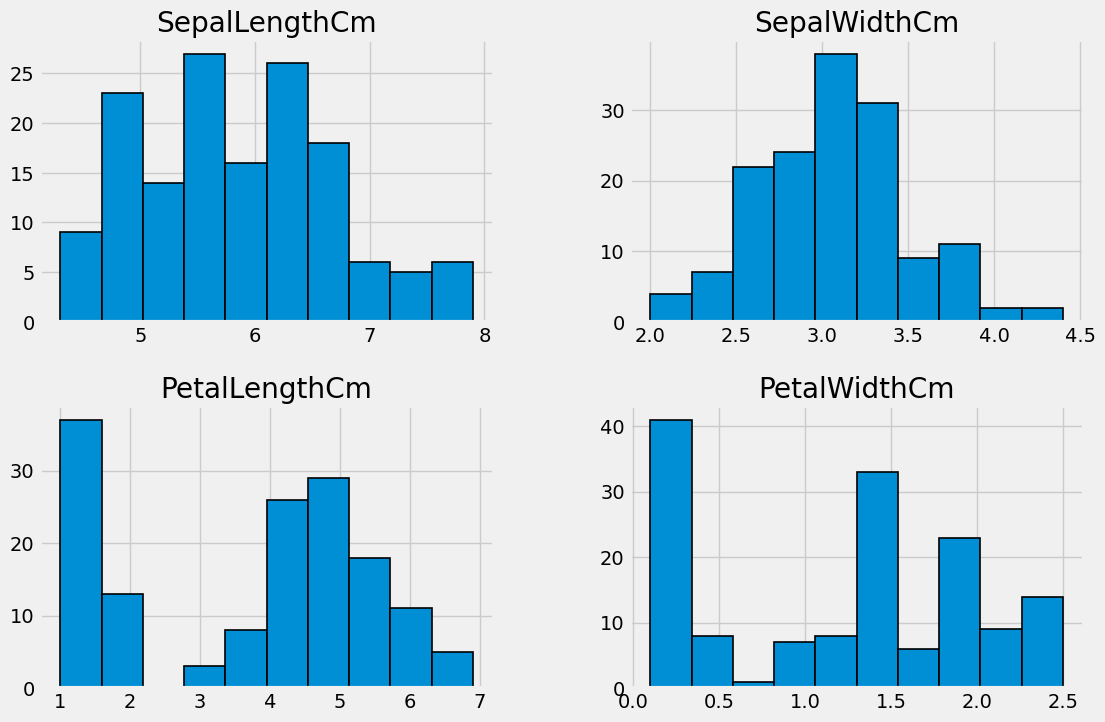

In [12]:
iris_data.iloc[:, 1:5].hist(edgecolor='black', linewidth=1.2, figsize=(12, 8))
plt.show()

From the figures above `SepalWidthCm` looks to be normally distributed. Let's investige more to see how the features are distributed and react with each other

***Pairplot of features***

C:\Users\rayap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rayap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rayap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rayap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

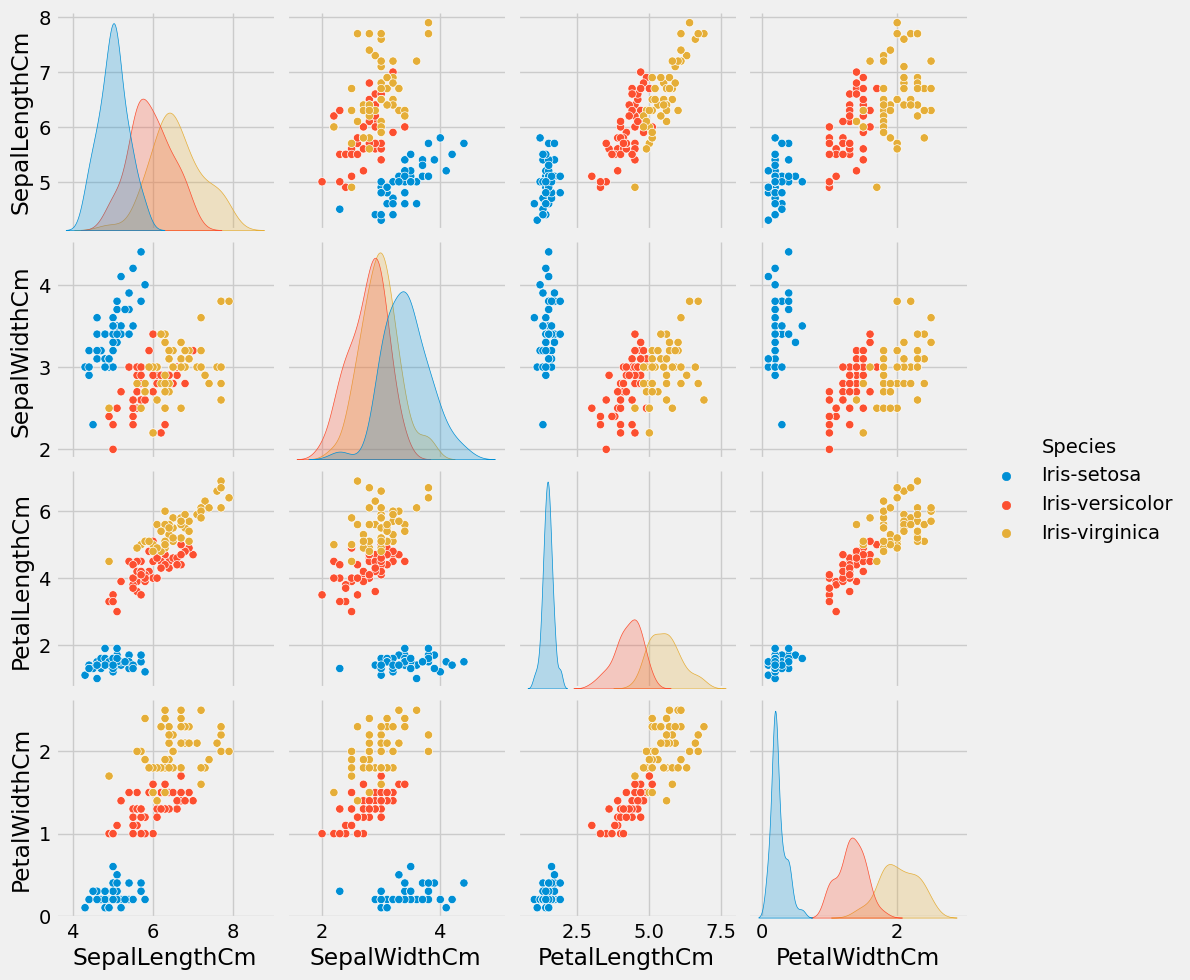

In [13]:
sns.pairplot(iris_data.iloc[:, 1:], hue='Species')
plt.show()

Even though it's only `SepalWidthCm` that is normally distributed, all data when grouped by species seem to be normally distributed. The scatter plots from the pairplot above shows the `Iris-setosa` specy's values are separated from the other species' values. On ther other hand, `Iris-versicolor` and `Iris-virginica` have values that are partially overlapping with each other.

***Correlation heatmap of features***

Let's take a look at how the features interact with each other

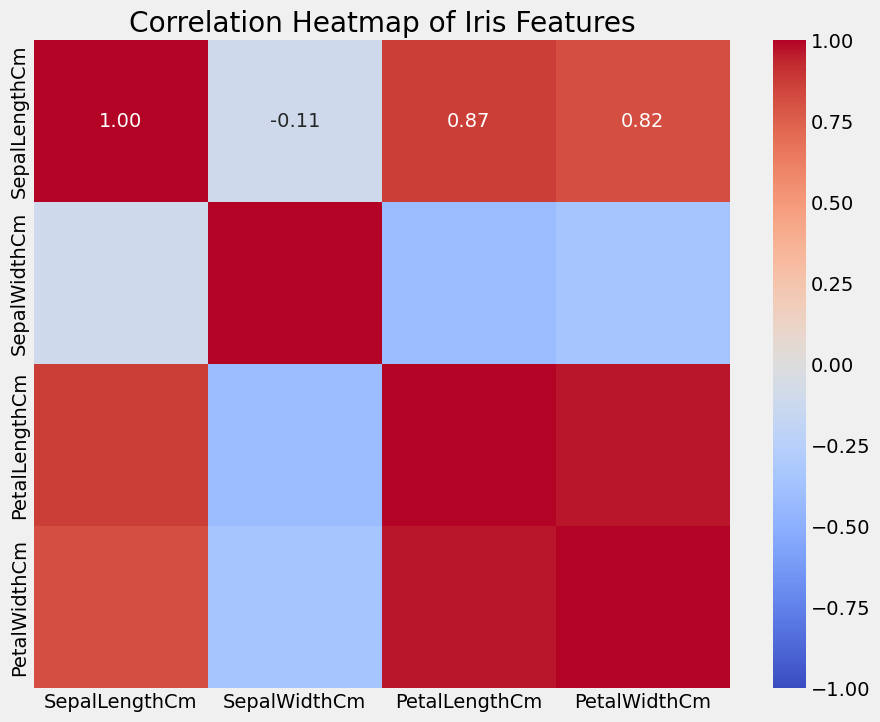

In [14]:
# Compute the correlation matrix
corr_matrix = iris_data.iloc[:, 1:5].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Iris Features')
plt.show()

From the heatmap above, there is a strong positive correlation between
- `SepalLengthCm` and `SepalLengthCm`

- `SepalLengthCm` and `PetalWidthCm`

### **Data Preprocessing**

***Convert Targer Variable using Label Encoding***

To be able to be able to run  effectively,Decision Trees needs the target variable to be numeric so we need to convert the target variable usng label encoding

In [15]:
# Display the unique values in the species column
print(iris_data['Species'].unique())

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the species column
iris_data['Species_Encoded'] = label_encoder.fit_transform(iris_data['Species'])
iris_data[["Species", "Species_Encoded"]].value_counts()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Species          Species_Encoded
Iris-setosa      0                  50
Iris-versicolor  1                  50
Iris-virginica   2                  50
Name: count, dtype: int64

Now,

0 - `Iris-setosa`  1 - `Iris-versicolor`  2 - `Iris-virginica`

***Drop Unwanted Columns***

We will now drop the Id and Species columns. Also we will change the names of the columns

In [16]:
iris_data_prep = iris_data.drop(["Id", "Species"], axis=1)

new_column_names = {
    'SepalLengthCm': 'Sepal Length (cm)',
    'SepalWidthCm': 'Sepal Width (cm)',
    'PetalLengthCm': 'Petal Length (cm)',
    'PetalWidthCm': 'Petal Width (cm)',
    'Species_Encoded': 'Species (Encoded)'
}
iris_data_prep.rename(columns=new_column_names, inplace=True)
iris_data_prep

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species (Encoded)
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


***Separate the Data***

Here we will separate the features from the target variable

In [17]:
X = iris_data_prep.iloc[:, :4]
y = iris_data_prep["Species (Encoded)"]
print(y)
X.head()

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species (Encoded), Length: 150, dtype: int32


,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


***Train / Test Split***

Before training the model we have split our data into Train and Test Data for training and validation purposes

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=60) #Initial Train/Test split

### **Building Classification Model**

Now we will proceed to build the model

In [19]:
dec_clf = DecisionTreeClassifier(random_state=60)

***Training and validating the model with the cross-validation technique***

In [21]:
cv_scores = cross_val_score(dec_clf, X_train, y_train, cv=10)

***Printing cross-validation scores***


In [22]:
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [1.         1.         0.91666667 0.91666667 1.         1.
 1.         0.91666667 1.         0.91666667]
Mean cross-validation score: 0.9666666666666666


The average cross-validation score is 96.666%

***Training the model***

Now we will train the classifier on the entire training set

In [23]:
dec_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=60)

***Visualize the Decision Tree***

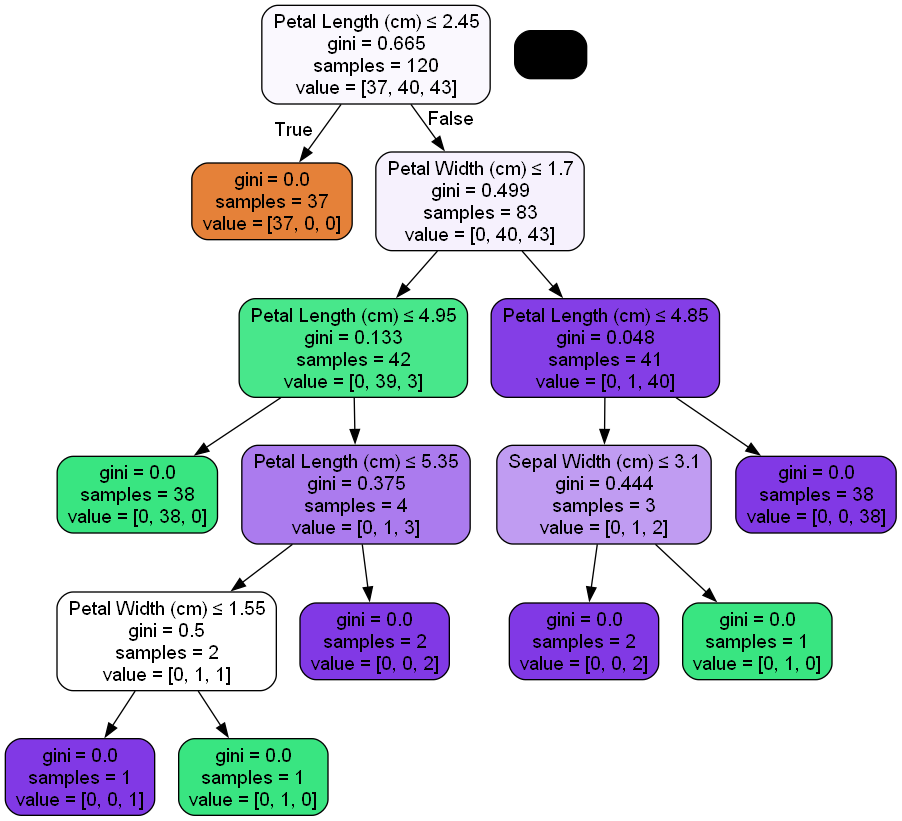

In [28]:
dot_data = StringIO()
export_graphviz(dec_clf, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

WITH CLASSES

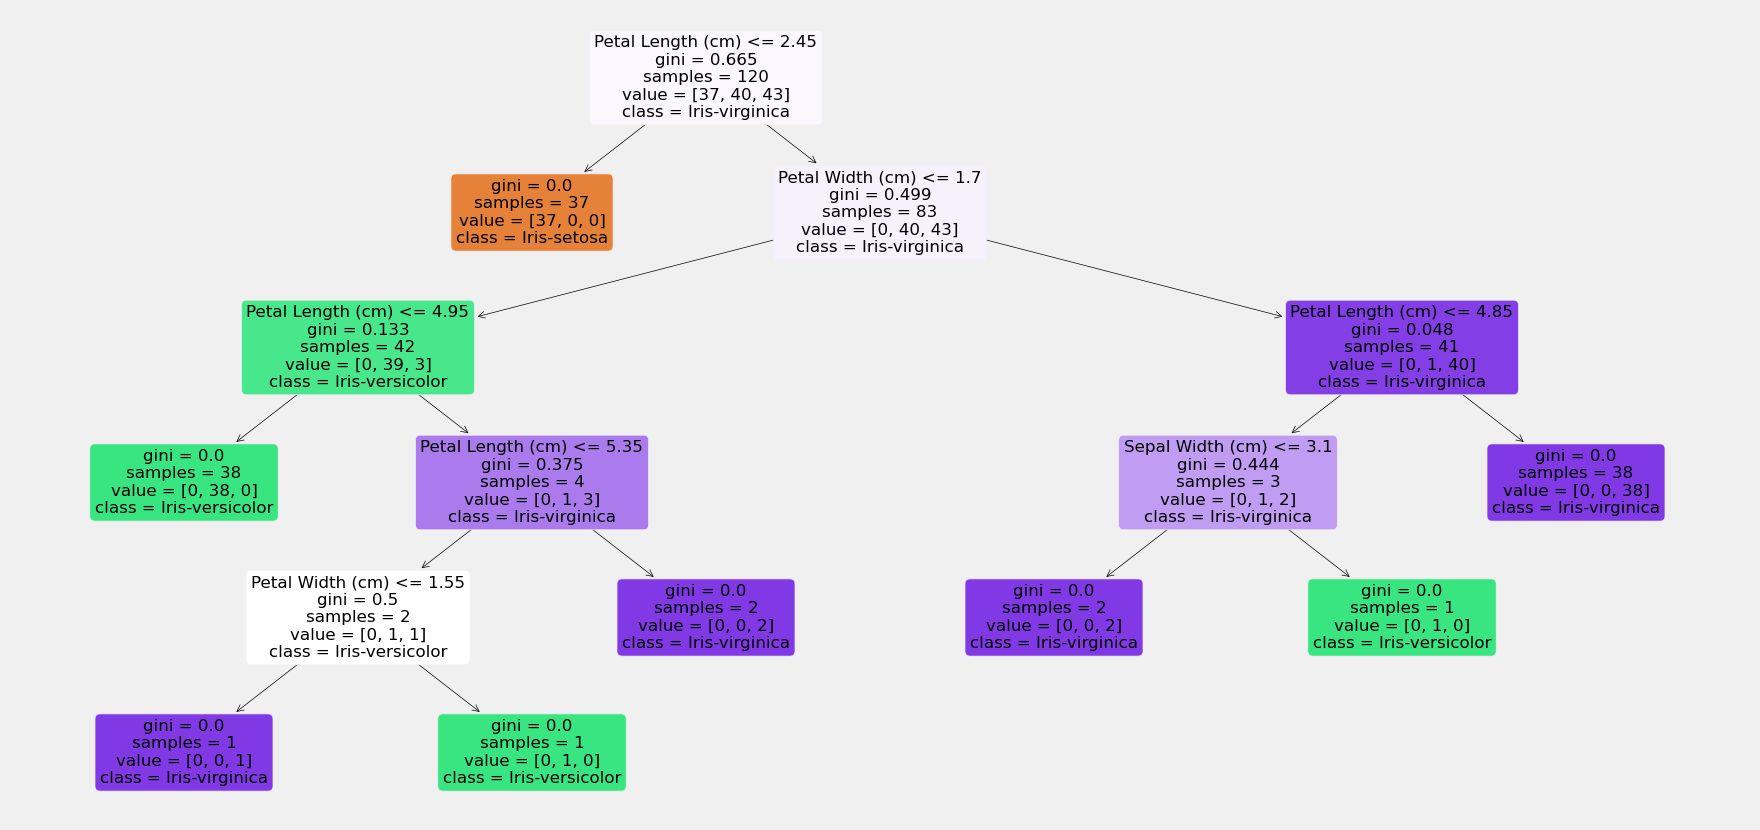

In [31]:
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(dec_clf, filled=True, feature_names=X.columns, class_names=label_encoder.classes_, rounded=True, fontsize=12)
plt.show()

### **Testing the Model**

Now we test the model on unseen data(test data and new data)

***Checking Model performance on test data***

In [34]:
# Make predictions on the test set
y_pred = dec_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.9666666666666667


The model has an accuracy score of 96.67%

***Testing on new data***

In [36]:
new_data_examples = [
    [5.1, 3.5, 1.4, 0.2],  # Example 1: Likely Iris-setosa
    [6.5, 3.0, 5.2, 2.0],  # Example 2: Likely Iris-virginica
    [5.9, 3.0, 4.2, 1.5],  # Example 3: Likely Iris-versicolor
    [4.7, 3.2, 1.3, 0.2],  # Example 4: Likely Iris-setosa
    [6.3, 3.3, 6.0, 2.5],  # Example 5: Likely Iris-virginica
    [5.5, 2.4, 3.8, 1.1],  # Example 6: Likely Iris-versicolor
    [4.9, 3.1, 1.5, 0.1],  # Example 7: Likely Iris-setosa
    [6.7, 3.1, 4.7, 1.5],  # Example 8: Likely Iris-versicolor
    [5.8, 2.7, 5.1, 1.9],  # Example 9: Likely Iris-virginica
    [4.6, 3.4, 1.4, 0.3],  # Example 10: Likely Iris-setosa
    [6.0, 2.2, 4.0, 1.0],  # Example 11: Likely Iris-versicolor
    [6.4, 2.8, 5.6, 2.2],  # Example 12: Likely Iris-virginica
]


# Predict the class for the new data examples
predicted_classes = dec_clf.predict(new_data_examples)
predicted_species = label_encoder.inverse_transform(predicted_classes)

# Print predicted species for each new data example
for i, species in enumerate(predicted_species):
    print(f"Example {i + 1}: Predicted species: {species}")

Example 1: Predicted species: Iris-setosa
Example 2: Predicted species: Iris-virginica
Example 3: Predicted species: Iris-versicolor
Example 4: Predicted species: Iris-setosa
Example 5: Predicted species: Iris-virginica
Example 6: Predicted species: Iris-versicolor
Example 7: Predicted species: Iris-setosa
Example 8: Predicted species: Iris-versicolor
Example 9: Predicted species: Iris-virginica
Example 10: Predicted species: Iris-setosa
Example 11: Predicted species: Iris-versicolor
Example 12: Predicted species: Iris-virginica


C:\Users\rayap\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### **Conclusion**

The Decision Tree classifier successfully classified the Iris dataset with a high accuracy, effectively predicting the species based on the input features. This demonstrates the model's capability to accurately differentiate between the various species of Iris flowers, showcasing the effectiveness of decision trees for classification tasks in this dataset.